In [1]:
import numpy as np
import matplotlib.pylab as plt
from numpy.linalg import inv
%matplotlib inline

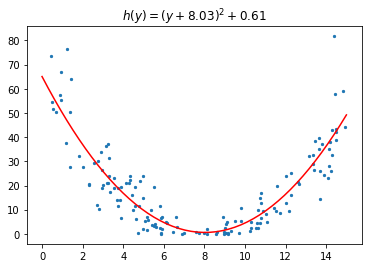

In [3]:
t = [np.random.uniform(0,15) for _ in range(150)]
u = [(t[i] + np.random.normal(0,1)-8)**2 for i in range(150)]
m = len(u)
f = lambda t,x : (t-x[0])**2 + x[1]
g = lambda x: sum([(f(t[i],x)-u[i])**2 for i in range(m)])
grad_g = lambda x: np.array([-4*sum([(t[i]-x[0])*((t[i]-x[0])**2 + x[1] - u[i]) for i in range(m)]),
                                  2*sum([(t[i]-x[0])**2 + x[1] - u[i] for i in range(m)])])

hes_g = lambda x: np.array([[sum([4*((t[i]-x[0])**2+x[1]-u[i])+8*(t[i]-x[0])**2 for i in range(m)]),
                                -4*sum([(t[i]-x[0]) for i in range(m)])],
                                [-4*sum([(t[i]-x[0]) for i in range(m)]),
                                2*m]])
x0 = np.array((0,0))
for i in range(100):
    A = hes_g(x0)
    x0 = x0 - np.matmul(inv(A),grad_g(x0))
_ = plt.scatter(t,u,s=5)
_ = plt.plot(np.linspace(0,15),[f(t,x0) for t in np.linspace(0,15)],color ='red')
_ = plt.title('$h(y)=(y+{:.2f})^2+{:.2f}$'.format(x0[0],x0[1]))